# S3. Exploratory Data Analysis: PV generation forecast



**Exploratory Data Analysis** (EDA) in data science is the process of analyzing datasets to summarize their main characteristics, often using visual methods. It’s an initial step used to understand the structure of the data, detect patterns, spot anomalies, and check assumptions before moving to more complex modeling. EDA helps data scientists gain insights and inform decision-making about how to treat the data in subsequent steps of analysis or machine learning.

Key components of EDA include:

* **Data Cleaning**: Handling missing data, removing duplicates, and correcting inconsistencies.
* **Descriptive Statistics**: Calculating basic statistics like mean, median, variance, and standard deviation to summarize data.
* **Data Visualization**: Using plots such as histograms, scatter plots, box plots, and correlation matrices to visually explore relationships, distributions, and trends.
* **Outlier Detection**: Identifying unusual data points that may skew the analysis.

# How to create a Supervised Learning model from scratch?

In this class we will focus on the initial part of this process. 

<img src="Figures/ml-process-eda-v2.png" alt="Drawing" style="width: 800px;"/>

## **Import libraries and data**

In [1]:
import sklearn  
import pandas as pd  
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Cargamos el conjunto de datos de entrada
dataset = pd.read_csv('Data/EJ1-data-pv.csv', delimiter=';')

## **Step 1:Understand data**

<img src="Figures/step1-understand-data-1.png" alt="Drawing" style="width: 600px;"/>


### Descriptive statistics

It is necessary to visualize and understand the data with which we are going to work, as well as to know its characteristics. 

1. How much data is there? How many attributes are there in the data?  
2. What do they mean?
3. Is there any missing data?
4. Statistical summary of the input data set.

**1. How much data is there? How many attributes are there in the data?**

In [3]:
dataset

,localhour,pressure,temperature,humidity,windspeed,rain,radiation,pvgen
0,19/02/2015 12:00,1024.4,17.0,56.0,4.0,0.0,672.0,6.646
1,19/02/2015 13:00,1022.8,18.0,47.0,4.0,0.0,865.0,7.364
2,19/02/2015 14:00,1021.4,19.0,47.0,4.0,0.0,781.0,7.418
3,19/02/2015 15:00,1019.9,20.0,41.0,4.0,0.0,664.0,6.616
4,19/02/2015 16:00,1018.6,21.0,42.0,4.0,0.0,505.0,4.795
...,...,...,...,...,...,...,...,...
25029,01/05/2018 19:00,1013.6,25.0,85.0,0.0,0.0,125.0,0.060
25030,01/05/2018 20:00,1014.0,24.0,84.0,0.0,0.0,2.0,0.000
25031,01/05/2018 21:00,1014.6,24.0,85.0,0.0,0.0,0.0,0.000
25032,01/05/2018 22:00,1015.3,24.0,86.0,0.0,0.0,0.0,0.000


In [5]:
# Filas x columnas de los datos
dataset.shape

(25034, 8)

**2. What do they mean?**

In [8]:
# Observa las primeras 5 filas de datos
dataset.head()

,localhour,pressure,temperature,humidity,windspeed,rain,radiation,pvgen
0,19/02/2015 12:00,1024.4,17.0,56.0,4.0,0.0,672.0,6.646
1,19/02/2015 13:00,1022.8,18.0,47.0,4.0,0.0,865.0,7.364
2,19/02/2015 14:00,1021.4,19.0,47.0,4.0,0.0,781.0,7.418
3,19/02/2015 15:00,1019.9,20.0,41.0,4.0,0.0,664.0,6.616
4,19/02/2015 16:00,1018.6,21.0,42.0,4.0,0.0,505.0,4.795


In [10]:
#  Data format (int/float/object)
dataset.dtypes

localhour       object
pressure       float64
temperature    float64
humidity       float64
windspeed      float64
rain           float64
radiation      float64
pvgen          float64
dtype: object

In [14]:
# Convert localhour column in a datetime type
dataset['localhour'] = pd.to_datetime(dataset['localhour'], format='%d/%m/%Y %H:%M')
dataset

,localhour,pressure,temperature,humidity,windspeed,rain,radiation,pvgen
0,2015-02-19 12:00:00,1024.4,17.0,56.0,4.0,0.0,672.0,6.646
1,2015-02-19 13:00:00,1022.8,18.0,47.0,4.0,0.0,865.0,7.364
2,2015-02-19 14:00:00,1021.4,19.0,47.0,4.0,0.0,781.0,7.418
3,2015-02-19 15:00:00,1019.9,20.0,41.0,4.0,0.0,664.0,6.616
4,2015-02-19 16:00:00,1018.6,21.0,42.0,4.0,0.0,505.0,4.795
...,...,...,...,...,...,...,...,...
25029,2018-05-01 19:00:00,1013.6,25.0,85.0,0.0,0.0,125.0,0.060
25030,2018-05-01 20:00:00,1014.0,24.0,84.0,0.0,0.0,2.0,0.000
25031,2018-05-01 21:00:00,1014.6,24.0,85.0,0.0,0.0,0.0,0.000
25032,2018-05-01 22:00:00,1015.3,24.0,86.0,0.0,0.0,0.0,0.000


In [16]:
# Now, run the Data format again (int/float/object)
dataset.dtypes

localhour      datetime64[ns]
pressure              float64
temperature           float64
humidity              float64
windspeed             float64
rain                  float64
radiation             float64
pvgen                 float64
dtype: object

**3. Is there any missing data?** A check is made to see if any data is missing, and if so, the count of empty cells in each attribute is performed. 

In [19]:
# Check if any data is missing and in which attribute
dataset.isna().sum()

localhour      0
pressure       3
temperature    1
humidity       3
windspeed      1
rain           0
radiation      2
pvgen          0
dtype: int64

**4. Statistical summary of the input data set.**

In [22]:
# write your code here
dataset.describe()

,localhour,pressure,temperature,humidity,windspeed,rain,radiation,pvgen
count,25034,25031.000000,25033.000000,25031.000000,25033.000000,25034.000000,25032.000000,25034.000000
mean,2016-09-21 06:14:40.370695936,1015.932460,21.415412,70.595621,1.432589,0.029356,177.629754,1.493409
min,2015-02-19 12:00:00,997.000000,-6.000000,11.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-01-10 18:15:00,1011.800000,17.000000,56.000000,0.000000,0.000000,0.000000,0.000000
50%,2016-09-27 13:30:00,1015.100000,22.000000,74.000000,1.000000,0.000000,3.000000,0.010000
75%,2017-06-15 13:45:00,1019.500000,27.000000,88.000000,2.000000,0.000000,291.000000,2.550750
max,2018-05-01 23:00:00,1045.500000,40.000000,98.000000,9.000000,32.800000,1101.000000,9.538000
std,NaN,6.258469,7.595223,19.502255,1.247985,0.462885,267.392486,2.241482


### We can create new features from the raw dataset


`datetime.dt` provides a wide range of methods to extract specific date and time components from a `datetime object`. Below is a list of the commonly used attributes and methods.


* `dataset['year'] = dataset['localhour'].dt.year`
* `dataset['month'] = dataset['localhour'].dt.month`
* `dataset['day'] = dataset['localhour'].dt.day`
* `dataset['hour'] = dataset['localhour'].dt.hour`
* `dataset['minute'] = dataset['localhour'].dt.minute`
* `dataset['week'] = dataset['localhour'].dt.week`
* `dataset['day_of_week'] = dataset['localhour'].dt.dayofweek`
* `dataset['day_name'] = dataset['localhour'].dt.day_name()`

For more information, check this website https://docs.python.org/3/library/datetime.html#datetime.date



In [24]:
# Add hour
dataset['hour'] = dataset['localhour'].dt.hour
dataset

,localhour,pressure,temperature,humidity,windspeed,rain,radiation,pvgen,hour
0,2015-02-19 12:00:00,1024.4,17.0,56.0,4.0,0.0,672.0,6.646,12
1,2015-02-19 13:00:00,1022.8,18.0,47.0,4.0,0.0,865.0,7.364,13
2,2015-02-19 14:00:00,1021.4,19.0,47.0,4.0,0.0,781.0,7.418,14
3,2015-02-19 15:00:00,1019.9,20.0,41.0,4.0,0.0,664.0,6.616,15
4,2015-02-19 16:00:00,1018.6,21.0,42.0,4.0,0.0,505.0,4.795,16
...,...,...,...,...,...,...,...,...,...
25029,2018-05-01 19:00:00,1013.6,25.0,85.0,0.0,0.0,125.0,0.060,19
25030,2018-05-01 20:00:00,1014.0,24.0,84.0,0.0,0.0,2.0,0.000,20
25031,2018-05-01 21:00:00,1014.6,24.0,85.0,0.0,0.0,0.0,0.000,21
25032,2018-05-01 22:00:00,1015.3,24.0,86.0,0.0,0.0,0.0,0.000,22


<div style="background-color:#ccffcc; padding:10px; border-radius:5px;">

### <span style="color:blue">Exercise 1</span>

Add two new features: month  and day
    </div>

In [26]:
# Write you code
#  Add month column and day column
dataset['Month'] = dataset['localhour'].dt.month
dataset['Day'] = dataset['localhour'].dt.day
dataset

,localhour,pressure,temperature,humidity,windspeed,rain,radiation,pvgen,hour,Month,Day
0,2015-02-19 12:00:00,1024.4,17.0,56.0,4.0,0.0,672.0,6.646,12,2,19
1,2015-02-19 13:00:00,1022.8,18.0,47.0,4.0,0.0,865.0,7.364,13,2,19
2,2015-02-19 14:00:00,1021.4,19.0,47.0,4.0,0.0,781.0,7.418,14,2,19
3,2015-02-19 15:00:00,1019.9,20.0,41.0,4.0,0.0,664.0,6.616,15,2,19
4,2015-02-19 16:00:00,1018.6,21.0,42.0,4.0,0.0,505.0,4.795,16,2,19
...,...,...,...,...,...,...,...,...,...,...,...
25029,2018-05-01 19:00:00,1013.6,25.0,85.0,0.0,0.0,125.0,0.060,19,5,1
25030,2018-05-01 20:00:00,1014.0,24.0,84.0,0.0,0.0,2.0,0.000,20,5,1
25031,2018-05-01 21:00:00,1014.6,24.0,85.0,0.0,0.0,0.0,0.000,21,5,1
25032,2018-05-01 22:00:00,1015.3,24.0,86.0,0.0,0.0,0.0,0.000,22,5,1




<img src="Figures/step1-understand-data-2.png" alt="Drawing" style="width: 600px;"/>



# Univariate plots

# Histogram

A histogram is a graphical representation of the distribution of numerical data in data science. It provides a visual way to understand how frequently each range of values (or bins) occurs in a dataset.

* The **x-axis** of a histogram is divided into intervals called bins or buckets. Each bin represents a range of values.
* The **y-axis** shows the frequency or count of data points that fall within each bin. This indicates how many observations fall into each range of values.

* Histograms help identify the **shape of the data distribution**, such as whether it is **normal (bell-shaped), skewed, uniform, or bimodal** (having two peaks).
* A histogram can also help to visualize any **outliers** in the data—values that fall far outside the range of the other observations.

 ### Examples of data shapes using histograms
 
 Histograms can have different shapes depending on the data they are representing.
[Source: LabXchange](https://www.labxchange.org/library/items/lb:LabXchange:10d3270e:html:1)
 
 <img src="Figures/type-histograms.png" alt="Drawing" style="width: 700px;"/>
 

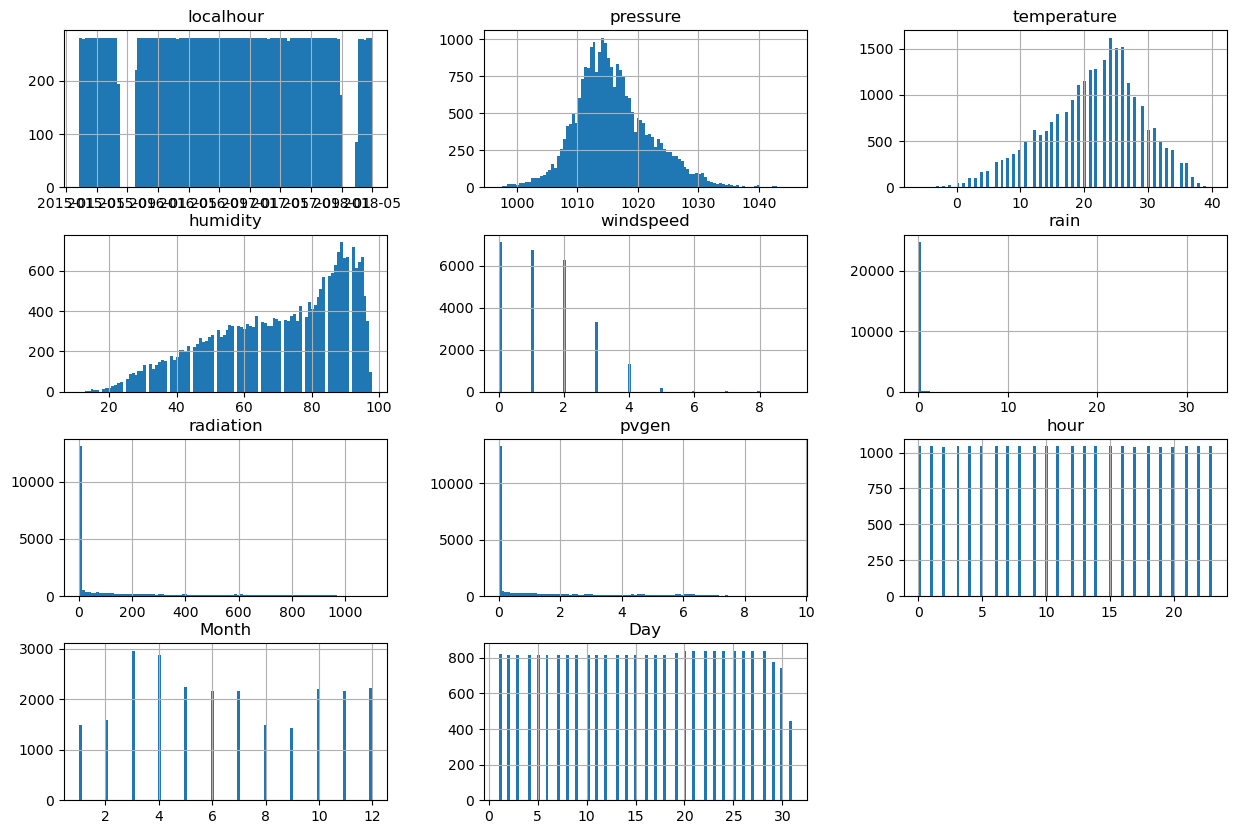

In [28]:
# we can plot the histogram in Pandas Dataframe directly using dataframe.hist()

histogram = dataset.hist(xlabelsize=10, ylabelsize=10, bins=100, figsize=(15, 10))

 <img src="Figures/type-histograms-2.png" alt="Drawing" style="width: 800px;"/>

# Density plots

A density plot is a data visualization technique used to **estimate the probability density function** of a continuous variable. It provides a smooth representation of the distribution of a dataset, helping to visualize the underlying distribution shape, central tendency, and variability of the data.



* **X-Axis**: Represents the variable being analyzed (e.g., values of a dataset).
* **Y-Axis**: Represents the estimated density of the data at each point along the x-axis.
* **Curve**: The smoothed curve that represents the estimated density function.

**Comparison with Histograms**
* **Smoothing**: Density plots provide a smoother visualization compared to histograms, which can appear jagged depending on the choice of bin size.
* **No Binning**: Density plots do not require binning, which means they can represent data more accurately without arbitrary choices affecting the representation.
* **Area Under the Curve**: The total area under a density plot equals 1, whereas the total area of a histogram is proportional to the number of observations.

There are several ways to plot the density curve

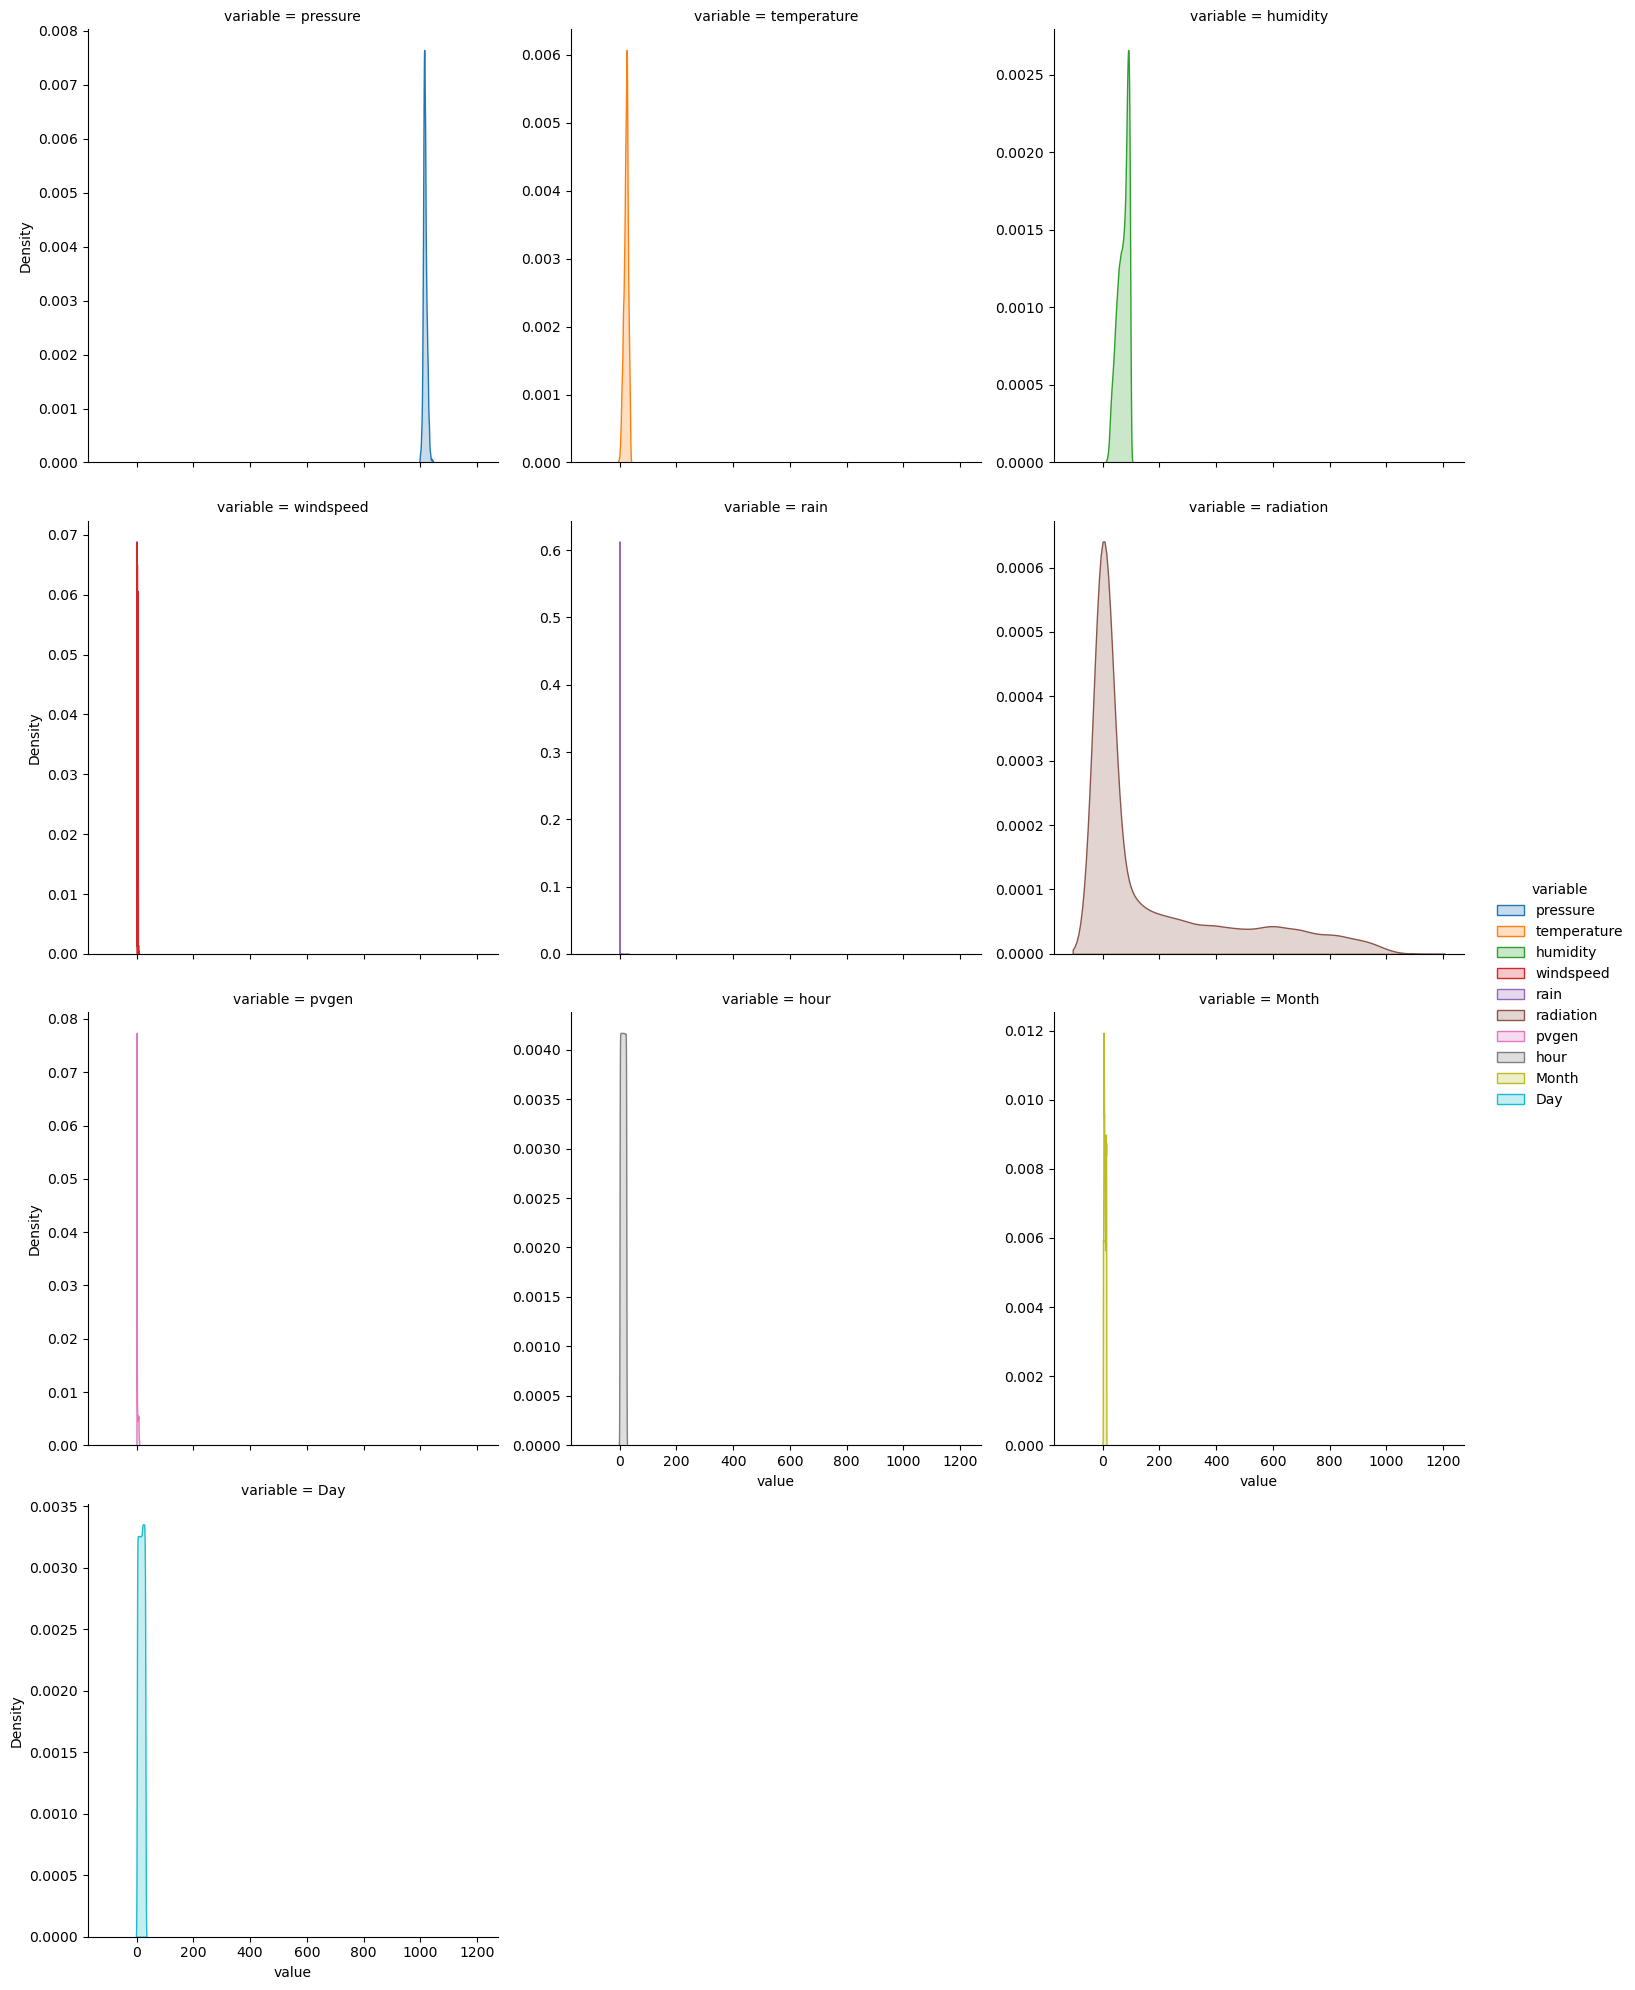

In [57]:
import seaborn as sns
sns.displot(
    data=dataset.select_dtypes(include='number').melt(), 
    x="value", 
    hue="variable", 
    kind="kde", 
    col="variable", 
    fill=True, 
    col_wrap=3,
    facet_kws={'sharey': False}
)
plt.show()

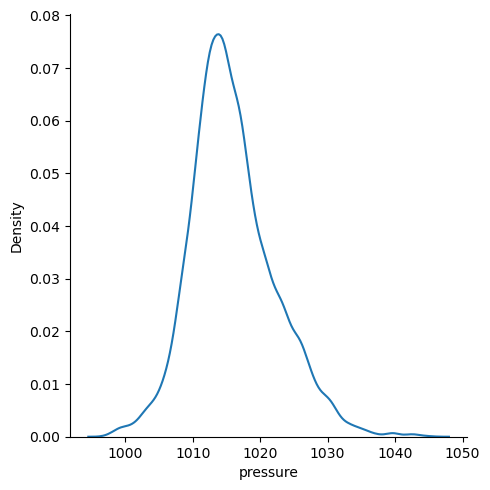

In [39]:

sns.displot(dataset['pressure'], kind='kde')


Plot all the features of the dataset

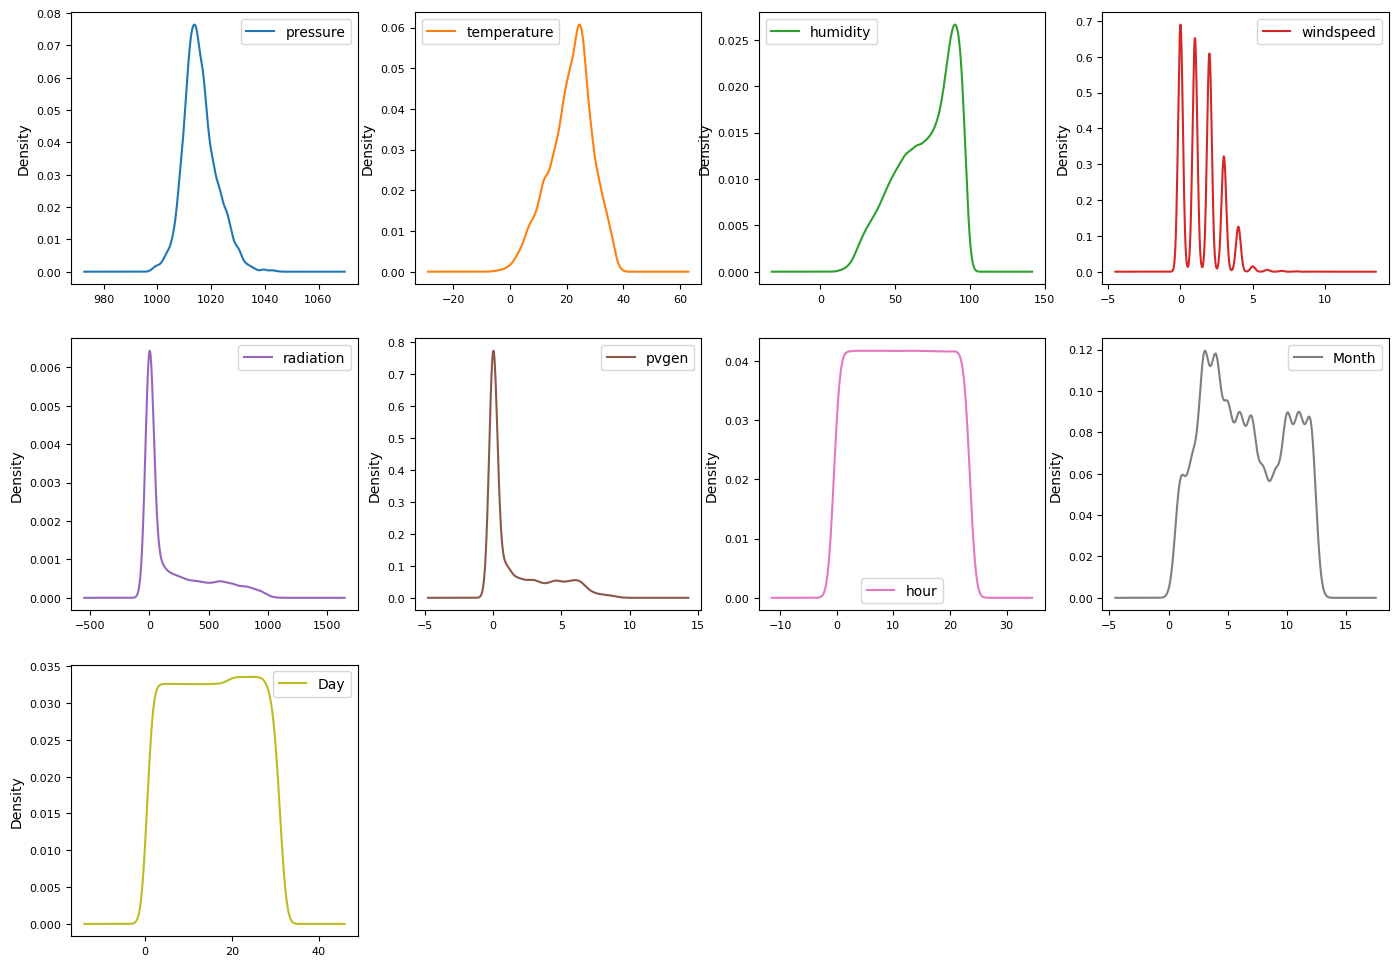

In [40]:
# Density Plots 
# dataframe columns are not allowed in this chart
density = dataset.iloc[:,1:].plot(kind='kde', x=4, subplots=True, legend=True, layout=(3, 4), figsize=(17, 12), sharex=False,
                        fontsize=8, stacked=True) 

# Boxplots

A boxplot, also known as a box-and-whisker plot, is a standardized way of displaying the distribution of a dataset based on five summary statistics:

* Minimum: The smallest data point, excluding outliers.
* First Quartile (Q1): The median of the lower half of the dataset (25th percentile).
* Median (Q2): The middle value of the dataset (50th percentile).
* Third Quartile (Q3): The median of the upper half of the dataset (75th percentile).
* Maximum: The largest data point, excluding outliers.


**Components of a Boxplot**

* **Box**: The box represents the interquartile range (IQR), which contains the middle 50% of the data (from Q1 to Q3). The length of the box indicates the degree of dispersion in the central half of the dataset.
* **Median Line**:A line inside the box marks the median (Q2). This line indicates where the middle of the data lies.
* **Whiskers**:The whiskers extend from the box to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles. They provide a visual indication of variability outside the upper and lower quartiles.
* **Outliers**: Points that fall outside of the whiskers are considered outliers and are often represented as individual points. They indicate values that are significantly lower or higher than the rest of the data.


* The factor of 1.5 is a standard convention established in statistical literature. The 1.5 factor has been found empirically to work well across various types of data distributions. 


 <img src="Figures/boxplot_explained.png" alt="Drawing" style="width: 700px;"/>
 




 <img src="Figures/Box-Plot-and-Whisker-Plot-2.png" alt="Drawing" style="width: 700px;"/>

### Create boxplot for each feature

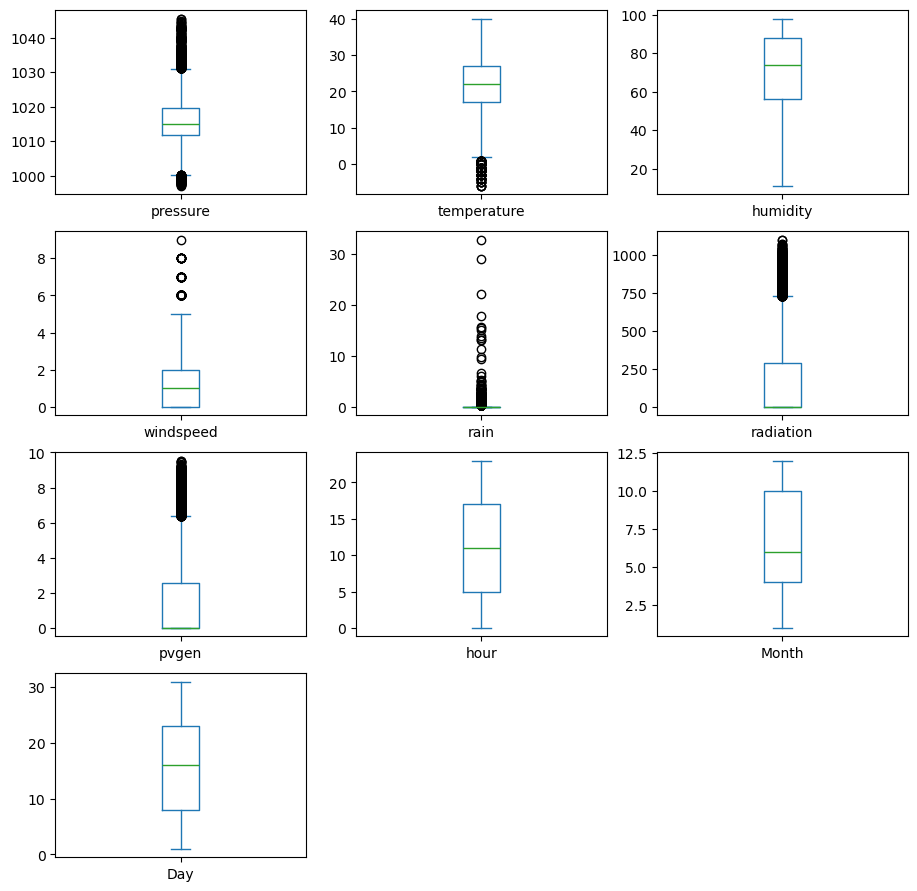

In [41]:
atributos_boxplot = dataset.plot(kind='box', subplots=True, layout=(4, 3), figsize=(11, 11),
                                 sharex=False, sharey=False, fontsize=10)

### Let's delete the outliers

**IQR Method:**

* The first quartile (Q1) and the third quartile (Q3) are calculated.
The IQR is computed as IQR = Q3-Q1 

* Outliers are defined as values below Q1 - 1.5·IQR or above  Q3 + 1.5·IQR 


In [59]:
# IQR method

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


df_no_outliers_iqr = remove_outliers_iqr(dataset, 'pressure')


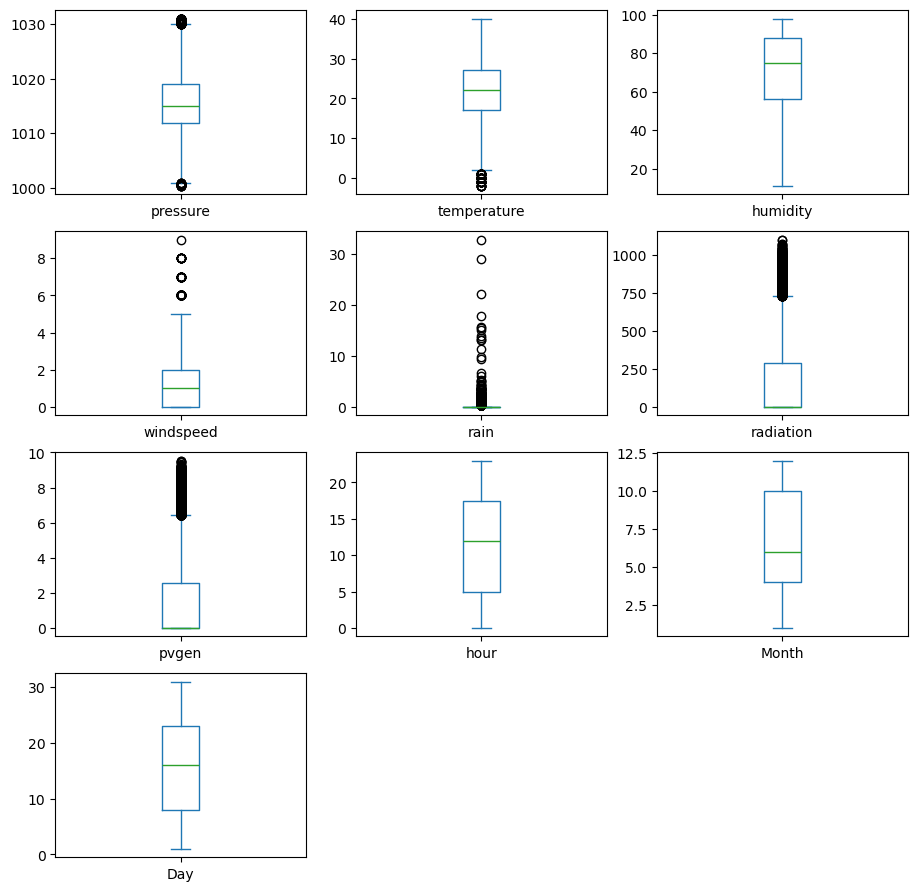

In [61]:
atributos_boxplot = df_no_outliers_iqr.plot(kind='box', subplots=True, layout=(4, 3), figsize=(11, 11),
                                 sharex=False, sharey=False, fontsize=10)


**Z-Score Method:**

* The Z-score for each value in the specified column is calculated.
* Values with a Z-score greater than 3 or less than -3 are considered outliers.

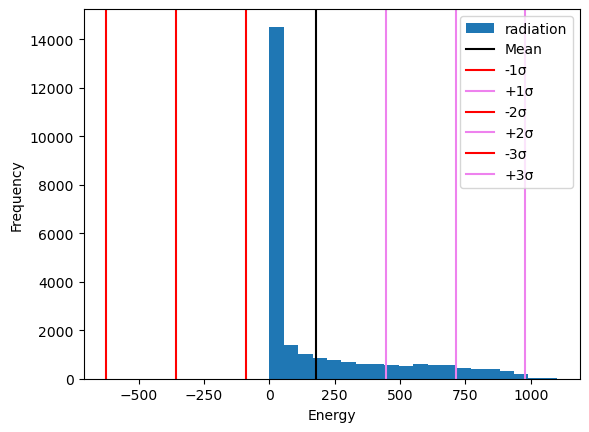

In [63]:
import matplotlib.pyplot as plt

mean = dataset['radiation'].mean()
st_dev = dataset['radiation'].std()
dataset['radiation'].plot.hist(bins=20)
plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean - st_dev, color = 'Red', label = '-1σ')
plt.axvline(mean + st_dev, color = 'Violet', label = '+1σ')
plt.axvline(mean - 2*st_dev, color = 'Red', label = '-2σ')
plt.axvline(mean + 2*st_dev, color = 'Violet', label = '+2σ')
plt.axvline(mean - 3*st_dev, color = 'Red', label = '-3σ')
plt.axvline(mean + 3*st_dev, color = 'Violet', label = '+3σ')
plt.xlabel('Energy')
plt.legend()

In [65]:
# Z-score
from scipy.stats import zscore


def remove_outliers_zscore(data, column):
    z_scores = zscore(data[column])
    print(z_scores)
    return data[(z_scores > -3) & (z_scores < 3)]

# there are some missing data we need to delete
dataset_clean = dataset.dropna()
df_no_outliers_zscore = remove_outliers_zscore(dataset_clean, 'radiation')


0        1.848515
1        2.570245
2        2.256124
3        1.818599
4        1.224013
           ...   
25029   -0.197009
25030   -0.656972
25031   -0.664451
25032   -0.664451
25033   -0.664451
Name: radiation, Length: 25024, dtype: float64


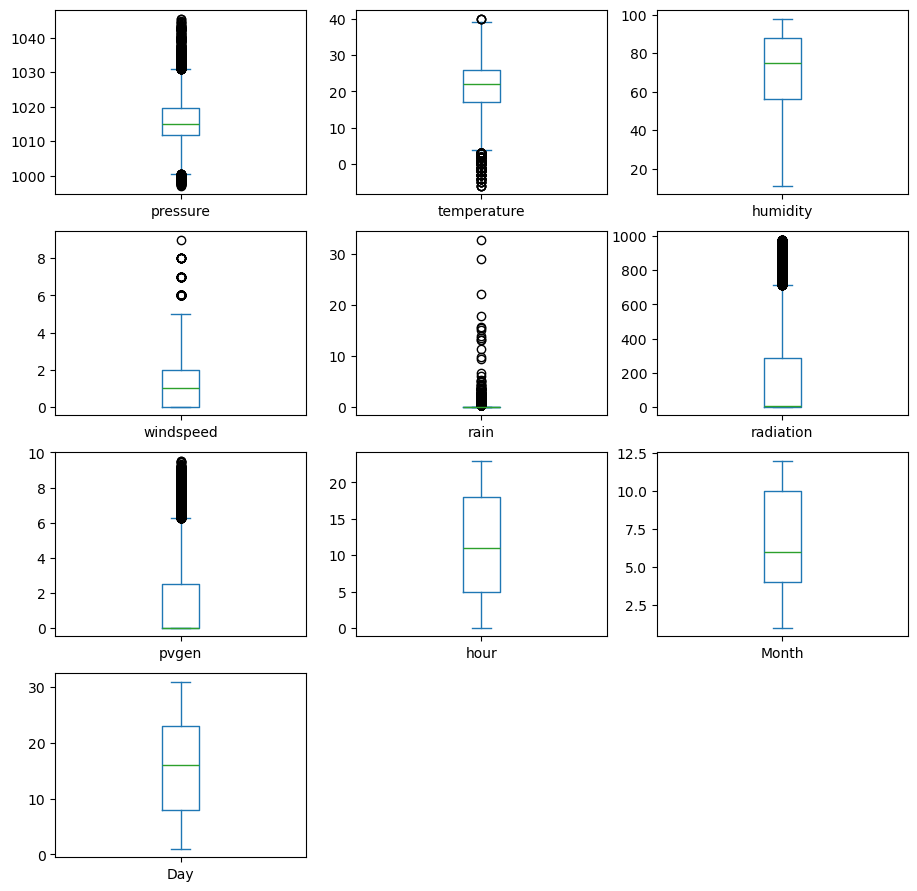

In [68]:
atributos_boxplot = df_no_outliers_zscore.plot(kind='box', subplots=True, layout=(4, 3), figsize=(11, 11),
                                 sharex=False, sharey=False, fontsize=10)

# Multivariate plots


<img src="Figures/step1-understand-data-2.png" alt="Drawing" style="width: 600px;"/>

## Dispersion matrix

A dispersion matrix, also referred to as a scatter matrix, is a collection of scatter plots arranged in a grid format where each variable in a dataset is plotted against every other variable. It helps visualize the pairwise relationships between multiple features in a dataset and is often used for exploratory data analysis.

Why is it useful? It helps tp:
* Detect correlations between variables.
* Identify trends, patterns, or clusters in the data.
* Spot outliers or non-linear relationships.

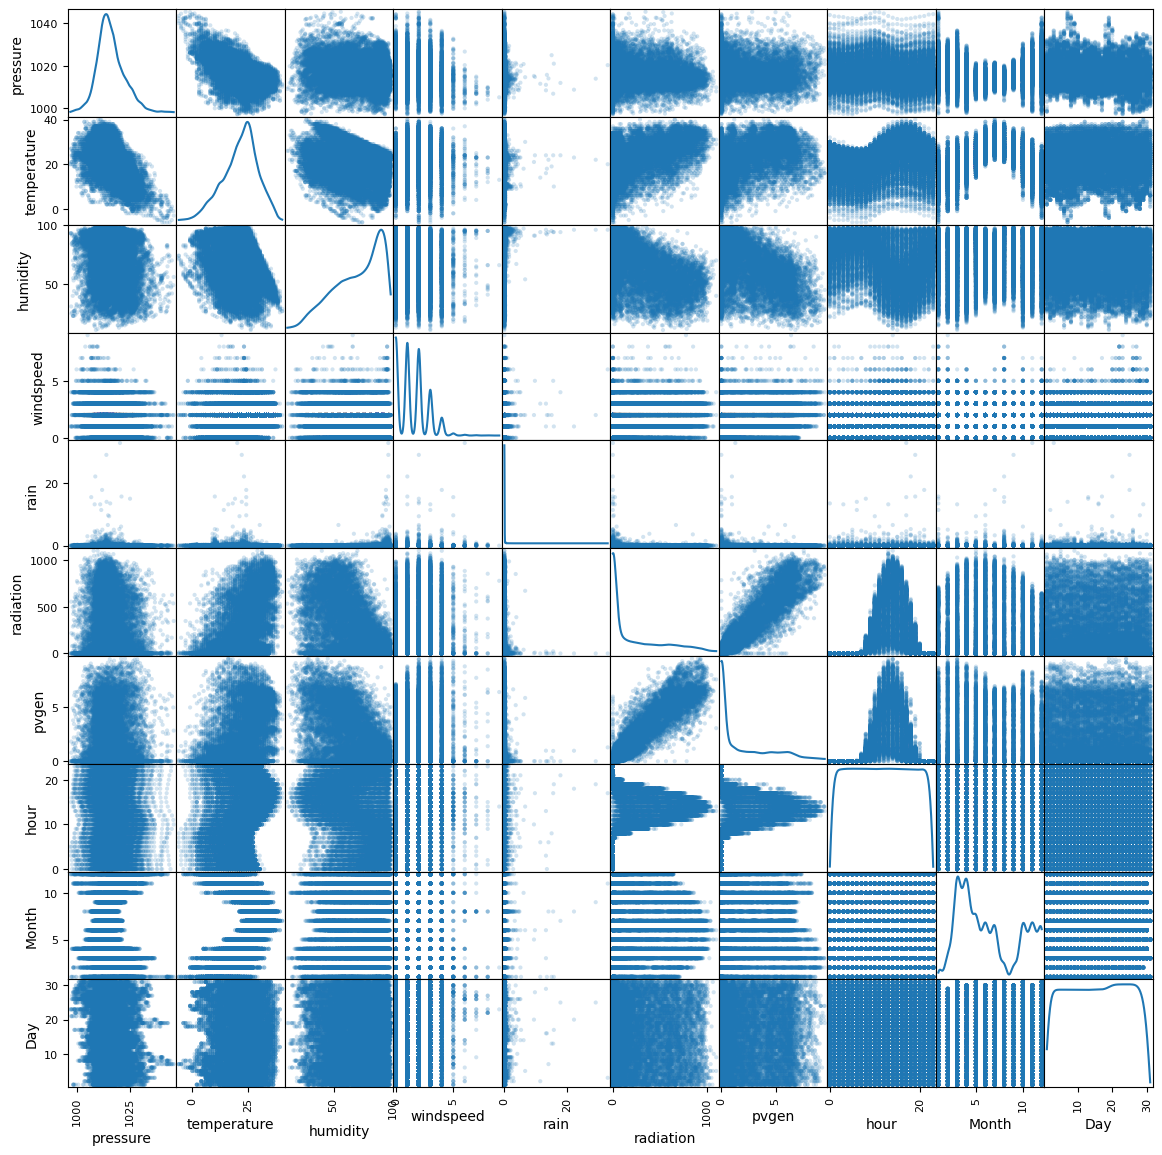

In [72]:
from pandas.plotting import scatter_matrix
# https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html


scatter_matrix(dataset, alpha=0.2, figsize=(14, 14), diagonal='kde', range_padding=0.05)
plt.show()

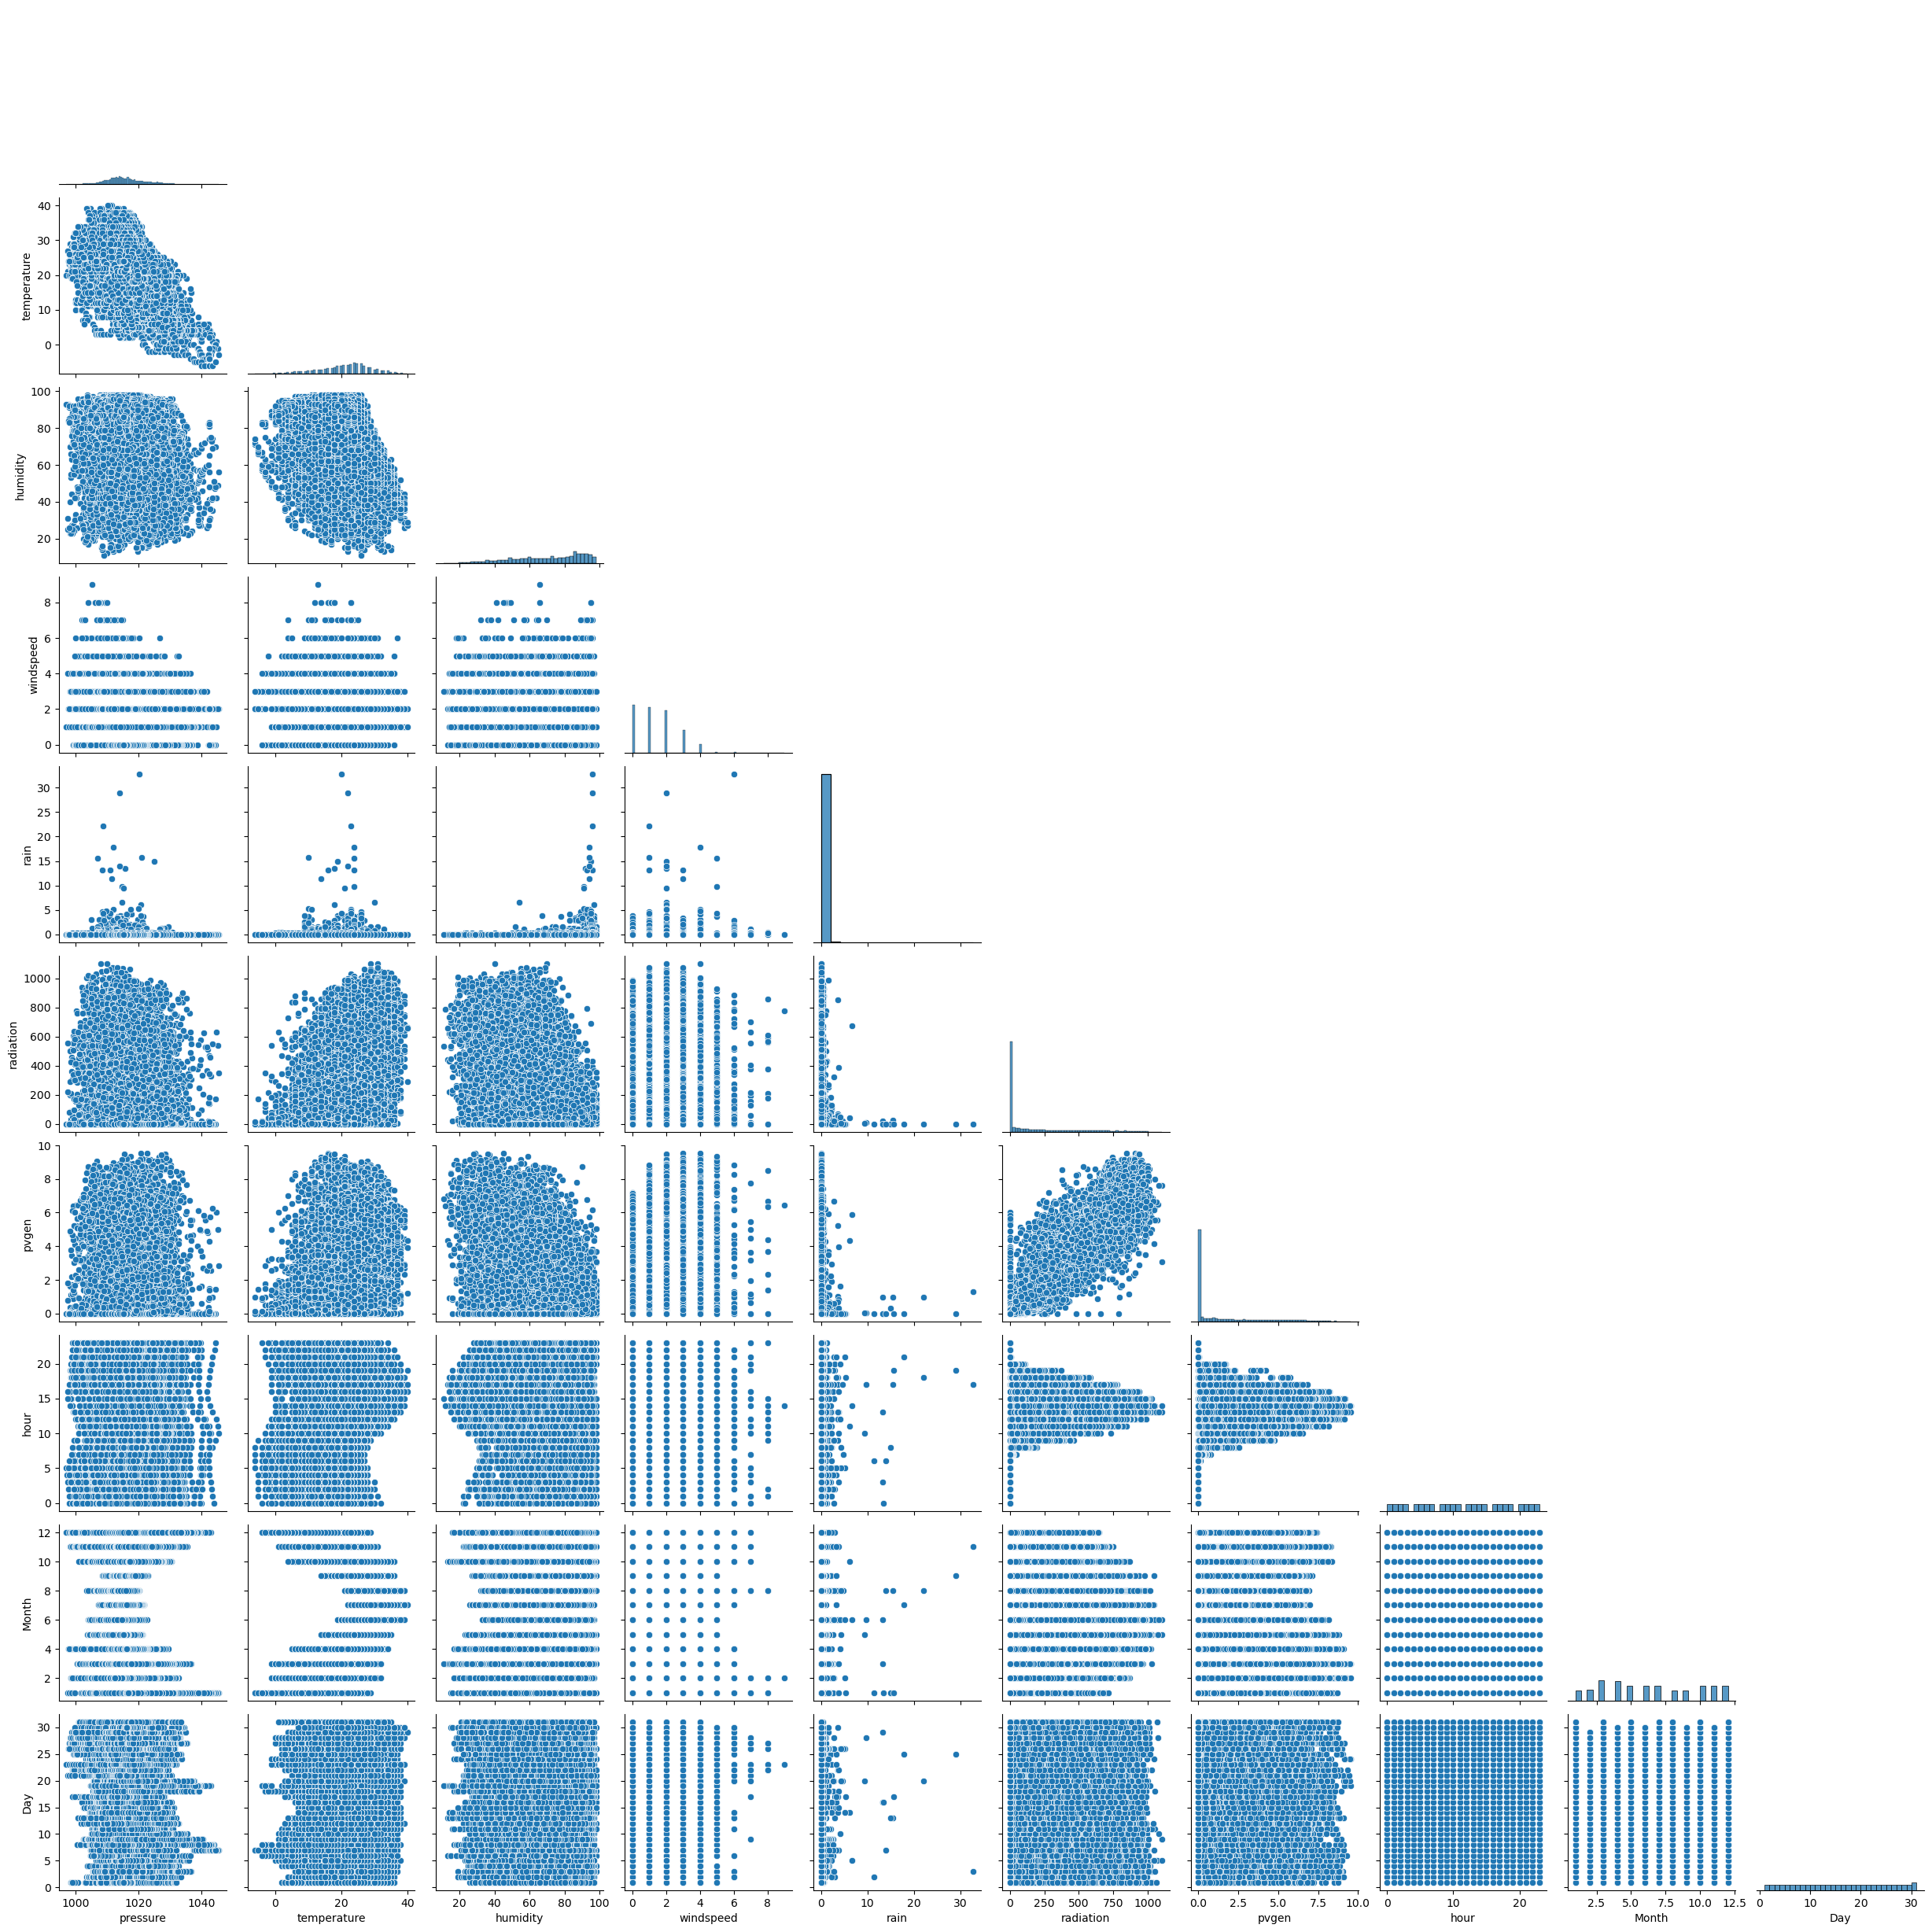

In [73]:
# Create the pair plot (scatter matrix)
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

sns.pairplot(dataset, corner=True)
plt.show()

## **Correlation matrix** 

A correlation matrix is a table that displays the pairwise correlation coefficients between multiple variables. Each cell in the matrix represents the correlation between two variables, with values ranging from -1 to +1.


* **+1** indicates a **perfect positive correlation**: as one variable increases, the other also increases proportionally.
* **0** indicates **no correlation**: changes in one variable do not predict changes in the other.
* **-1** indicates a **perfect negative correlation**: as one variable increases, the other decreases proportionally.

The diagonal of the matrix always contains ones (1) because each variable is perfectly correlated with itself.


<img src="Figures/correlation.png" alt="Drawing" style="width: 600px;"/>


* **Pearson** correlation measures the **linear relationship** between two continuous variables
* **Spearman** correlation assesses the **monotonic relationship** between two continuous variables.
* Spearman’s Rank Correlation is ideal for data that isn’t normally distributed or lacks a linear relationship.
* The choice between Spearman and Pearson depends on your data and research question.
* Correlation does not imply causation.


In [74]:

# Calculation of correlation coefficients
corr = dataset.iloc[:,1:].corr(method='spearman')  # method{‘pearson’, ‘kendall’, ‘spearman’} 
corr

,pressure,temperature,humidity,windspeed,rain,radiation,pvgen,hour,Month,Day
pressure,1.000000,-0.495690,-0.113446,-0.223454,-0.031442,-0.045857,-0.012471,-0.077281,0.059375,-0.063961
temperature,-0.495690,1.000000,-0.264798,0.286496,-0.050505,0.416715,0.353635,0.268665,0.130216,0.004267
humidity,-0.113446,-0.264798,1.000000,-0.220299,0.183138,-0.458844,-0.410753,-0.399565,0.069655,0.026476
windspeed,-0.223454,0.286496,-0.220299,1.000000,0.015760,0.352191,0.327527,0.179567,-0.180467,0.008008
rain,-0.031442,-0.050505,0.183138,0.015760,1.000000,-0.030864,-0.028154,0.003337,-0.029721,0.005971
radiation,-0.045857,0.416715,-0.458844,0.352191,-0.030864,1.000000,0.956503,0.281447,-0.032098,-0.003904
pvgen,-0.012471,0.353635,-0.410753,0.327527,-0.028154,0.956503,1.000000,0.216342,-0.035867,-0.002205
hour,-0.077281,0.268665,-0.399565,0.179567,0.003337,0.281447,0.216342,1.000000,-0.000890,-0.002007
Month,0.059375,0.130216,0.069655,-0.180467,-0.029721,-0.032098,-0.035867,-0.000890,1.000000,-0.004103
Day,-0.063961,0.004267,0.026476,0.008008,0.005971,-0.003904,-0.002205,-0.002007,-0.004103,1.000000


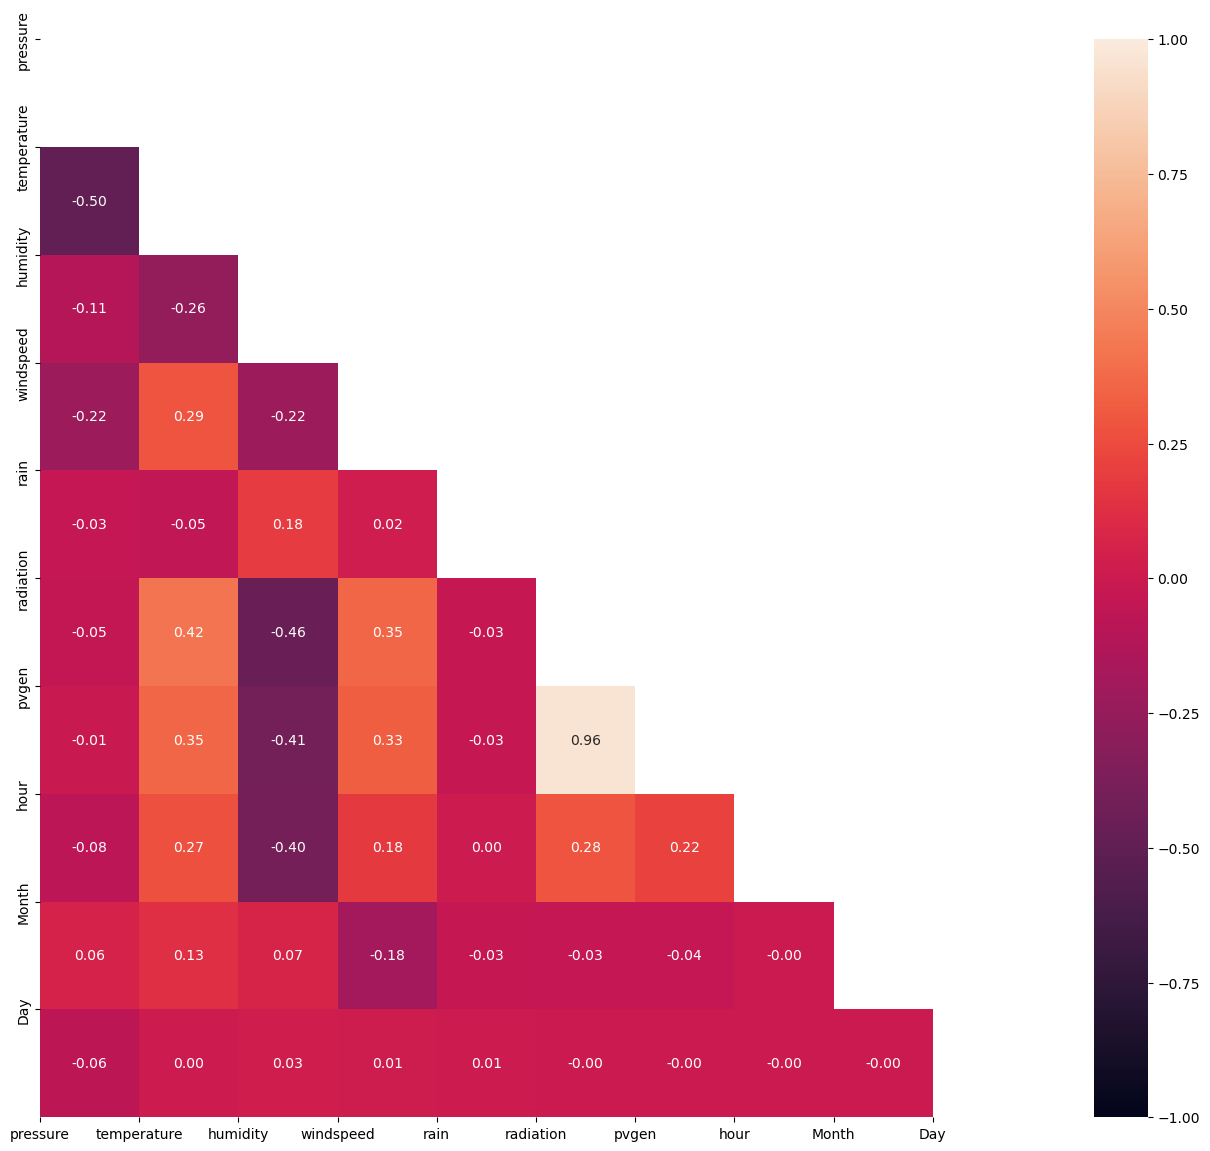

In [75]:

import seaborn as sns
import numpy as np


mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))
#Generar Heat Map,
sns.heatmap(corr, annot=True, fmt=".2f", mask=mask, vmin=-1, vmax=1)
    # xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    # yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    # plot
plt.show()


<div style="background-color:#ccffcc; padding:10px; border-radius:5px;">

### <span style="color:blue">Exercise 2</span>

Use the pearson method. Does the correlation matrix changed a lot?
    </div>

In [ ]:
# write your code here












<div style="background-color:#ccffcc; padding:10px; border-radius:5px;">

### <span style="color:blue">Exercise 3</span>

+ Which features are not relevant for PV generation forecast?
+ Delete them
    </div>

## *Step 2: Prepare dataset*

Data cleaning


 <img src="Figures/step1-understand-data-3.png" alt="Drawing" style="width: 700px;"/>

### Data cleaning


`missingno ` Missing data visualization. Library to see where the missing data is.

<Axes: >

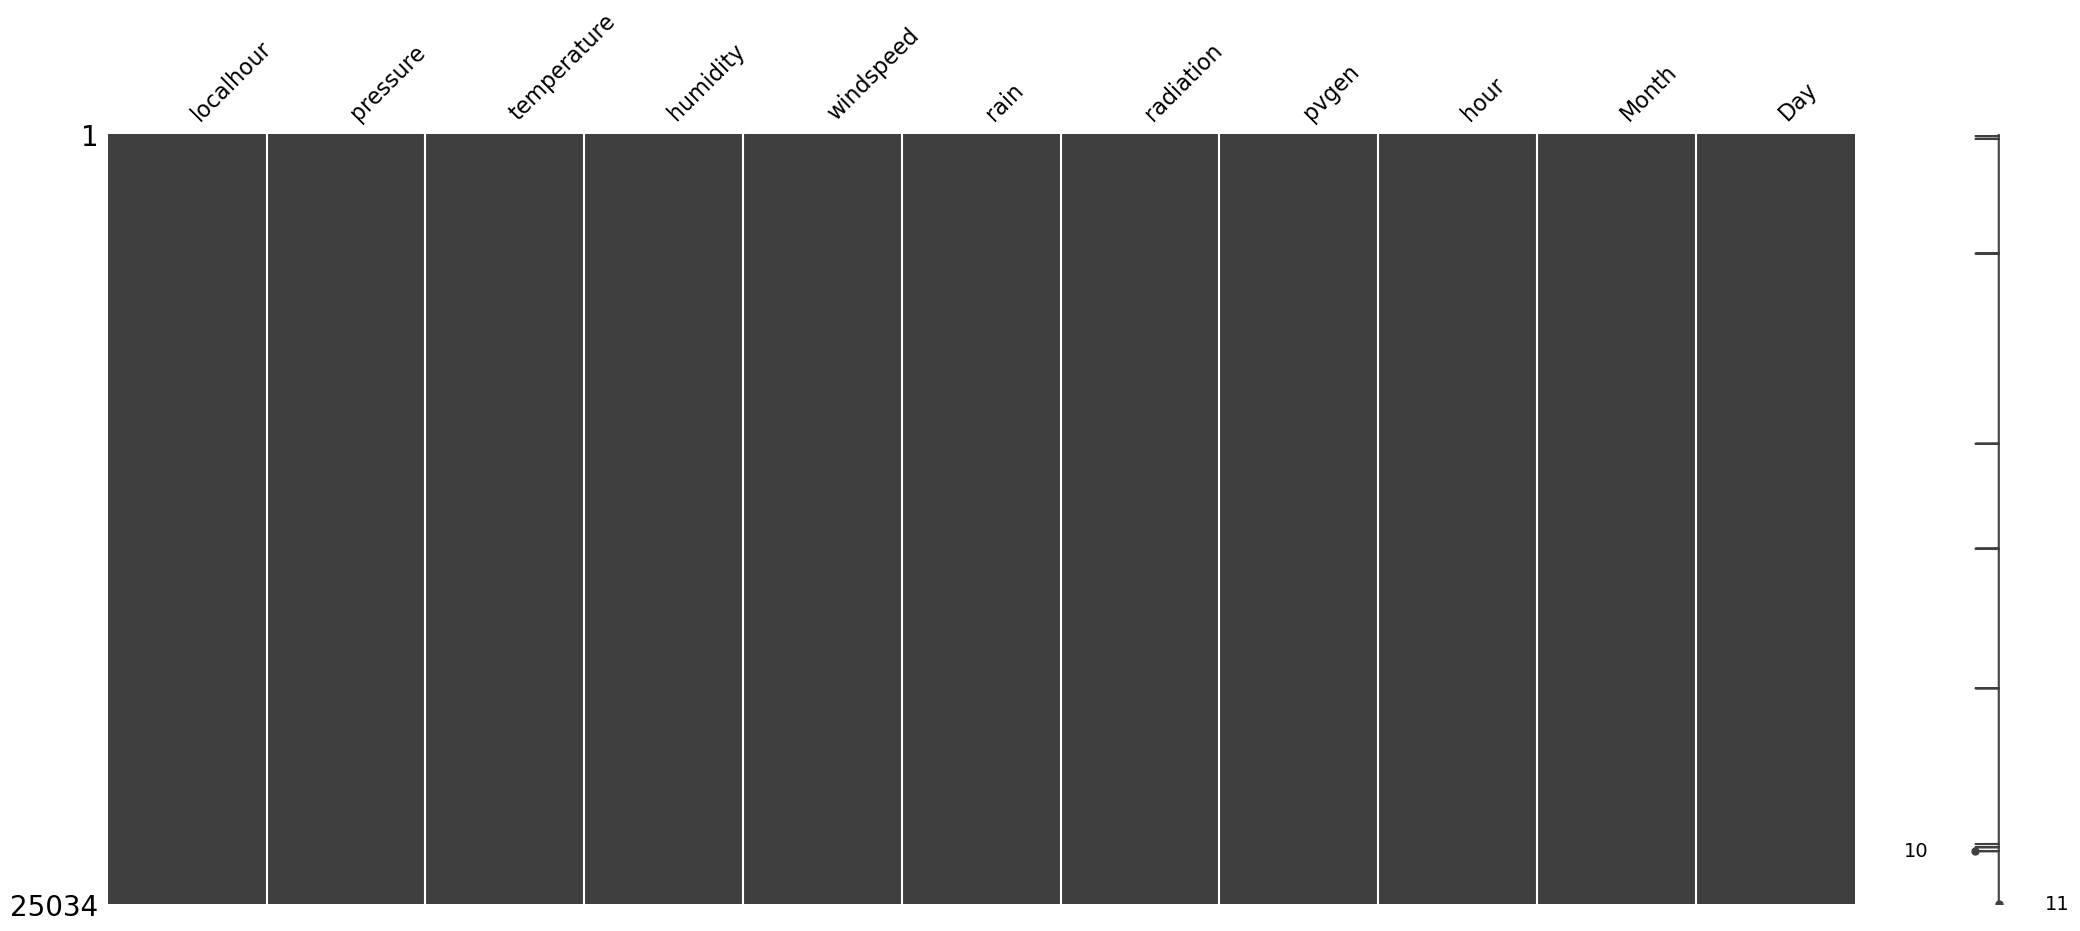

In [77]:
# pip install missingno
import missingno as msno


# Visualize missing data with missingno
msno.matrix(dataset)


Check if Nan exists in the input data. 

- The [fillna] method of Pandas is used.
- More information about how to impute values with [Scikit Learn].
- Other methods can be used for imputation: interpolation, AI libraries to impute values, mean, median, etc. 

[Scikit Learn]: https://scikit-learn.org/stable/modules/impute.html
[fillna]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

**Imputation**

In [78]:
dataset.isna().sum()

localhour      0
pressure       3
temperature    1
humidity       3
windspeed      1
rain           0
radiation      2
pvgen          0
hour           0
Month          0
Day            0
dtype: int64

The `.fillna()` of Pandas is used

* ffill: propagate last valid observation forward to next valid.
* backfill / bfill: use next valid observation to fill gap.

In [80]:
dataset_imputate = dataset.fillna(method="backfill")
dataset_imputate.shape

(25034, 11)

Comprobamos de nuevo que no existe ningún **Nan**

In [82]:
# Comprobar si falta algún dato y en qué atributo
dataset_imputate.isna().sum()


localhour      0
pressure       0
temperature    0
humidity       0
windspeed      0
rain           0
radiation      0
pvgen          0
hour           0
Month          0
Day            0
dtype: int64

In [83]:
print('Total missing data: ', dataset.isna().sum().sum())

Total missing data:  10


**Rows deletion**

Use `.dopna()` method. 

`DataFrame.dropna(*, axis=0, how=<no_default>, thresh=<no_default>, subset=None, inplace=False, ignore_index=False)[source]`


In [93]:
dataset_rows_deletion = dataset.dropna()
dataset_rows_deletion.shape

(25024, 11)

In [95]:
# Comprobar si falta algún dato y en qué atributo
dataset_rows_deletion.isna().sum()

localhour      0
pressure       0
temperature    0
humidity       0
windspeed      0
rain           0
radiation      0
pvgen          0
hour           0
Month          0
Day            0
dtype: int64

## Pandas Profiling

##### Pandas Profiling: Tool to generates an exploratory analysis of the dataset in use. When executed, an HTML report is generated with:
* Quantile statistics
* Descriptive statistics
* Most frequent values
* Histograms
* Correlations
* Missing values
   
   Among others

In [99]:
#!pip install ydata-profiling

In [101]:
import pandas as pd
import ydata_profiling
from ydata_profiling import ProfileReport

In [102]:
#apply ProfileReport

london = pd.read_csv('Data/block_13_diario.csv')
profile = ProfileReport(london, title='Profile Report')
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]